## <center>CSCI E-82</center>
## <center>HW 1  Dimensionality Reduction</center>
### <center>Due: Sept 17, 2018 11:59pm EST</center>

#### Note that this is an individual homework to be completed without collaborations except through Piazza.  

#### We encourage you to make progress this weekend since the second homework will likely come out in a week before this one is due.



### Your name:

Sharjil Khan

### Problem 1   (5 points)

$$\mathbf{X} = \left[\begin{array}
{rrr}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{array}\right]
$$

$$\mathbf{Y} = \left[\begin{array}
{rrr}
1 & 2 & 1 \\
2 & 1 & 2  
\end{array}\right]
$$

Compute XY<sup>T</sup>.  The answer can be computed by hand and written in Markdown like the above matrices, or computed in python.  Either way is acceptable.

In [3]:
import numpy as np

X = np.array([[1,2,3],[4,5,6],[7,8,9]])
Y = np.array([[1,2,1],[2,1,2]])

print("Answer = \n", np.dot(X,Y.T))




Answer = 
 [[ 8 10]
 [20 25]
 [32 40]]


### Problem 2  

This problem goes through a combination of python data manipulations as well as the full math projection using PCA.  We have divided the problem into multiple parts.



### Problem 2a  (5 points)

Download and load in the data set from the UCI archive https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/.  Print the dimensions and the first few rows to demonstrate a successful load.

In [4]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data'
ecoli = pd.read_csv(url, delim_whitespace=True, header= None)
rows, columns = ecoli.shape
print("Rows: %d, Columns: %d" %(rows, columns))
ecoli.head()

Rows: 336, Columns: 9


0     1     2     3    4     5     6     7   8
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35  cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44  cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46  cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36  cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35  cp

### Problem 2b  (10 points)
Compute and print the covariance matrix for all columns excluding the first and last.  Rather than use the built-in function, compute this using python code for practice.  The following equation will suffice for this.

Cov(X, Y) = Σ ( Xi - X ) ( Yi - Y ) / N 


In [5]:
from sklearn import decomposition, preprocessing

#DROP FIRST AND LAST COLUMN 
cols = [0,8]
ecoli_numeric = ecoli.drop(ecoli.columns[cols],axis=1)

#SUBTRACT MEAN TO CENTER THE DATA AROUND 0 ON ALL AXIS
mu = ecoli_numeric.mean(axis=0)
ecoli_0 = ecoli_numeric - mu

#CALCULATE MANUALLY
means = ecoli_0.mean(axis=0)
ecoli0 = ecoli_0 - means
N, column_num = ecoli0.shape

# FUNCTION TO COMPUTE EACH ROW OF THE COVARIANCE MATRIX
def covariance_row (matrix , column_values ):
    N, column_num = matrix.shape
    row = []
    for i in range(1, column_num+1):
        dot_prod = np.dot(matrix.iloc[:, (i-1): i].T, column_values)
        row.append(dot_prod[0,0]/N)
    return row
# FUNCTION TO COMPUTE THE COVARIANCE MATRIX
def covariance_matrix(dataframe):
    N, column_num = dataframe.shape
    cov = []
    for i in range(0,column_num):
        cov.append(covariance_row(dataframe, dataframe.iloc[:,i:i+1]))
    return cov

#GET THE COVARIANCE MATRIX AND PRINT IT
C = np.array(covariance_matrix(ecoli0))
print(C)


[[ 3.77696393e-02  1.30758929e-02  2.52169785e-03  3.71935232e-04
   5.24106966e-03  1.66205251e-02  6.78989690e-03]
 [ 1.30758929e-02  2.18851190e-02  5.72619048e-04  7.44047619e-05
   1.26220238e-03  5.52916667e-03 -3.71815476e-03]
 [ 2.52169785e-03  5.72619048e-04  7.80810658e-03  7.50779478e-04
   7.57872732e-04  1.82342687e-03 -1.06371173e-03]
 [ 3.71935232e-04  7.44047619e-05  7.50779478e-04  7.41833192e-04
  -1.48853812e-04 -4.49085884e-05 -2.97220451e-04]
 [ 5.24106966e-03  1.26220238e-03  7.57872732e-04 -1.48853812e-04
   1.49312491e-02  7.35713754e-03  6.45596035e-03]
 [ 1.66205251e-02  5.52916667e-03  1.82342687e-03 -4.49085884e-05
   7.35713754e-03  4.64100872e-02  3.64568931e-02]
 [ 6.78989690e-03 -3.71815476e-03 -1.06371173e-03 -2.97220451e-04
   6.45596035e-03  3.64568931e-02  4.37222497e-02]]


### Problem 2c  (10 points)

Compute the decomposition of the covariance matrix using singular value decomposition.  Using a python function is definitely the way to go here.

In [8]:
# FIND THE EIGENVALUES AND EIGENVECTORS FROM THE COVARIANCE MATRIX
eigenvalues, eigenvectors = np.linalg.eigh(C)


#SORT THE EIGENVALUES IN DESCENDING ORDER
idx = np.argsort(-eigenvalues)
eigenvalues = eigenvalues[idx]
print('Eigenvalues Sorted:')
print(eigenvalues)
eigenvectors = eigenvectors[:,idx]
print('Eigenvectors Sorted:')
print(eigenvectors)

# COMPUTE U, S, V
U = eigenvectors
S = eigenvalues * np.eye(column_num)
V = U.T

print("\nU:")
print(U)
print("S:")
print(S)
print("V:")
print(V)

# CHECK IF ORIGINAL COVARIANCE MATRIX IS RETURNED
D = np.dot(U, np.dot(S,  V))
np.allclose(C,D)


Eigenvalues Sorted:
[0.08943556 0.0423127  0.01458897 0.01284528 0.00850822 0.00492059
 0.00065696]
Eigenvectors Sorted:
[[-3.41720629e-01 -7.29824958e-01  4.56914809e-01  3.52555665e-01
  -1.29441525e-01  2.62199804e-02 -8.56193962e-03]
 [-9.17492644e-02 -5.28794379e-01 -7.04480258e-01 -3.42514767e-01
  -1.39018617e-01  2.81111220e-01  2.89703065e-04]
 [-1.99698823e-02 -7.25012267e-02  9.24097367e-02 -1.46705018e-02
   8.54762221e-01  4.93627297e-01 -1.06318528e-01]
 [ 9.74209562e-04 -1.16809378e-02  8.81896510e-03  1.64849996e-02
   8.61437517e-02  6.21081678e-02  9.94100049e-01]
 [-1.47115119e-01 -4.80496808e-02  4.70463079e-01 -8.66343630e-01
  -4.86492931e-02 -3.90505852e-02  1.64278490e-02]
 [-6.89914858e-01  7.21275410e-02 -2.54072739e-01 -1.83906883e-02
   3.50569568e-01 -5.75266798e-01  9.64476070e-03]
 [-6.13827312e-01  4.18124394e-01  2.07514962e-02  8.37356323e-02
  -3.17196689e-01  5.83358230e-01 -5.01770938e-03]]

U:
[[-3.41720629e-01 -7.29824958e-01  4.56914809e-01  3.52

True

### Problem 2d  (10 points)

Compute the projection of the raw data onto the appropriate two eigenvectors.  Consider which columns should be projected and the normalizations.

In [10]:
# The data was centered so there is not need to normalize the eigenvectors
# The U matrix is sorted from highest eigenvalue to lowest in previous section so no need to re-arrange here.

Comp_num = 2

# PROJECT DATA ON TOP TWO EIGENVECTORS    
ecoli_PCA =np.dot(ecoli0,U[:,0:Comp_num])
print(ecoli_PCA)






[[ 0.28560071  0.03527368]
 [ 0.29083817  0.330159  ]
 [ 0.10467597 -0.0152477 ]
 [ 0.08794301 -0.12221767]
 [ 0.3662676   0.21036611]
 [ 0.08023001 -0.08327277]
 [ 0.38555357  0.18739006]
 [ 0.33190109  0.23519751]
 [ 0.0643298   0.28387054]
 [ 0.37151499  0.00296018]
 [ 0.27966348  0.12284697]
 [ 0.4529588   0.08559031]
 [ 0.33173181  0.09719732]
 [ 0.21901728 -0.07979446]
 [ 0.4749507   0.12710027]
 [ 0.12989914  0.24257591]
 [ 0.34865965  0.06878927]
 [-0.02836356  0.19918564]
 [ 0.34335381  0.19045807]
 [ 0.3513704  -0.06094186]
 [ 0.55679426 -0.12278632]
 [ 0.58759337  0.08869104]
 [ 0.15979858 -0.06365125]
 [ 0.52580325  0.18313219]
 [ 0.42007625  0.02949799]
 [ 0.11604049  0.22828575]
 [ 0.26570136  0.19234895]
 [ 0.27790173  0.15703056]
 [ 0.17204237  0.08376635]
 [ 0.22504571  0.06064461]
 [ 0.2613917  -0.03012105]
 [ 0.22853447  0.17780982]
 [ 0.11665082 -0.06620763]
 [ 0.20581659  0.15325011]
 [ 0.46135353  0.17768333]
 [ 0.16504526  0.06125132]
 [ 0.29438979  0.08667428]
 

### Problem 2e  (10 points)

Plot the projected points such that the 8 different classes can be visually identified.  Be sure to label the classes and axes.  Commont on the quality of the separation of the different classes using PCA.

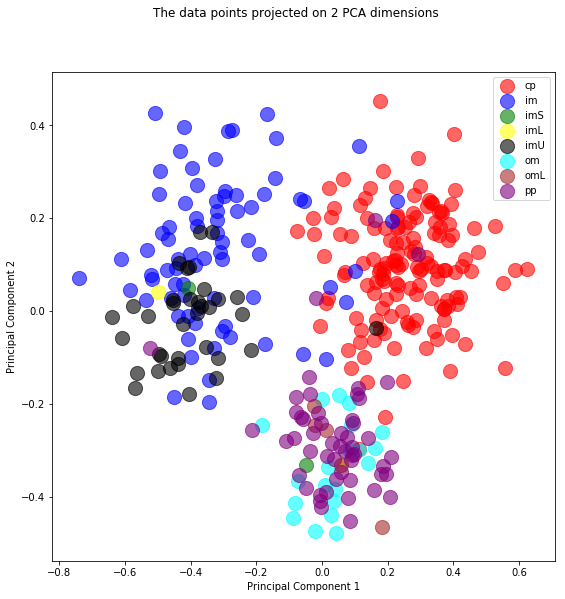

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.style

from matplotlib.colors import ListedColormap
# Remember to use inline to get your plots in the notebook
%matplotlib inline 

# FUNCTION TO DRAW THE PLOT
def draw_plot(df_PCA, df_orig, title):
    cdict = {'cp':'red', 'im':'blue', 'imS':'green', 'imL':'yellow', 'imU':'black', 'om':'cyan', 'omL':'brown', 'pp':'purple'}
    plt.figure(figsize=(9,9))
    plt.suptitle(title)
    for c in df_orig[8].unique():
        idx = np.where(df_orig[8]== c)
        plt.scatter(df_PCA.T[0][idx], df_PCA.T[1][idx], s=200, color = cdict[c], alpha = 0.6, label= c)
    plt.legend()
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()    

draw_plot(ecoli_PCA, ecoli, 'The data points projected on 2 PCA dimensions')


The two PCA components are able to clearly seperate between 'cp', 'im' and 'pp'.
But these two PCA components are not able to capture the difference between 'im' and 'imU'.
It is also not able to capture the difference between 'om' and 'pp'.

So we can conclude these 2 PCA dimensions are able to seperate between some classes very well.
But we might need to look at some of the other dimensions to see if we can find the difference between the classes that are not very well seperated on these 2 dimensions.

### Problem 2f (10 points)

The PCA that you have just completed takes each data point and projects it using a weighted sum of features.  One could also do the opposite to map the features as a weighted sum of the data entries.  How could this be done?  What is a potential issue? Describe these in a few sentences (do not code it).

We could take the transpose of the original data matrix such that each data entry would become seperate columns(features), and the features will become rows.Then we can apply the same PCA dimensionality reduction techniques to map the features into a weighted sum of the data entries.

Since, we have a lot of data entries, the covariance matrix will be very large.
If the covariance matrix is very large, each eigenvector will likely capture a small percentage of the variance. So, we will have to include many components to capture enough variance of the data to be able to do meaningful analysis.

### Problem 3  MDS  (10 points)

For the same data set, repeat 2e using sklearn's Multidimensional scaling algorithm.  

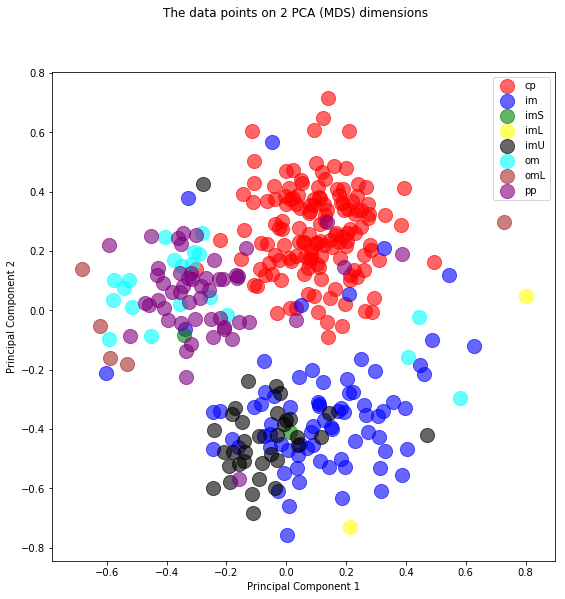

In [14]:
from sklearn.manifold import MDS
ecoli_PCA_MDS = MDS(n_components = 2).fit_transform(ecoli0)
 
#print(ecoli_PCA_MDS)
draw_plot(ecoli_PCA_MDS, ecoli, 'The data points on 2 PCA (MDS) dimensions')

### Problem 4a  t-SNE  (5 points)

Repeat 2e using a t-SNE plot with the default settings.

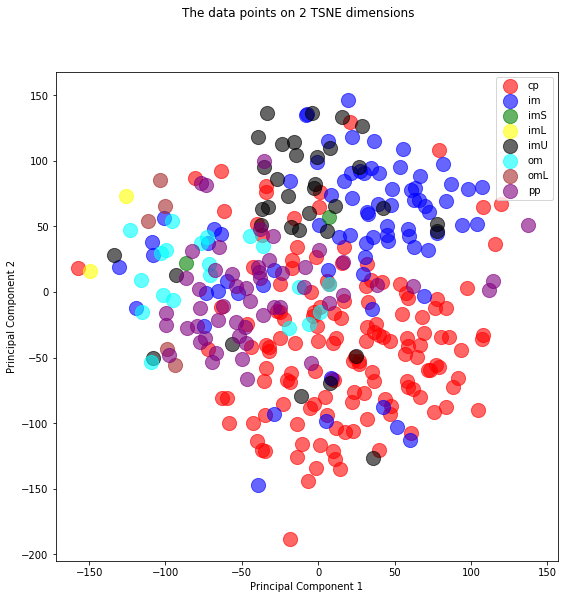

In [15]:
from sklearn.manifold import TSNE

ecoli_TSNE = TSNE(n_components=3, perplexity=35, verbose=0).fit_transform(ecoli0)
draw_plot(ecoli_TSNE, ecoli, 'The data points on 2 TSNE dimensions')

### Problem 4b t-SNE perplexity  (5 points)

Try out a few t-SNE plots by varying the perplexity.  State the best perplexity for separating the 8 different classes and describe your rationale in a sentence or two.  Report the average calculation time for the t-SNE projection over a number of iterations.

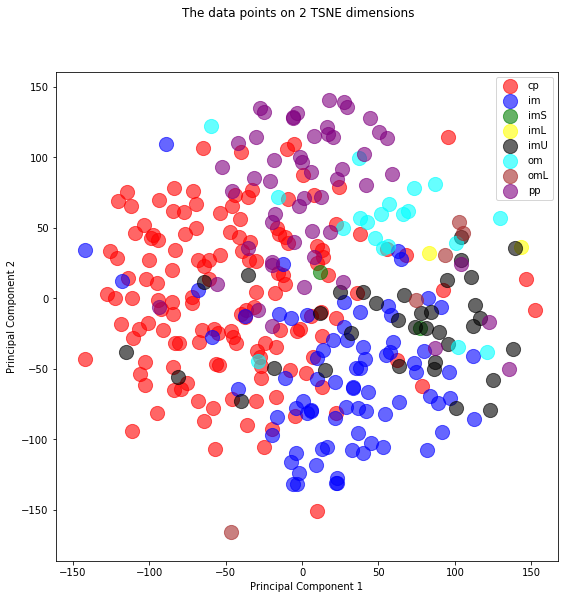

12.971605778 seconds
Perplexity = 25


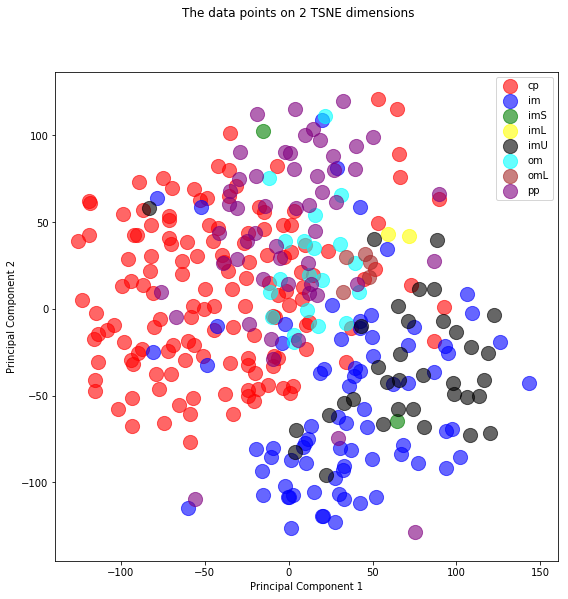

Perplexity = 30


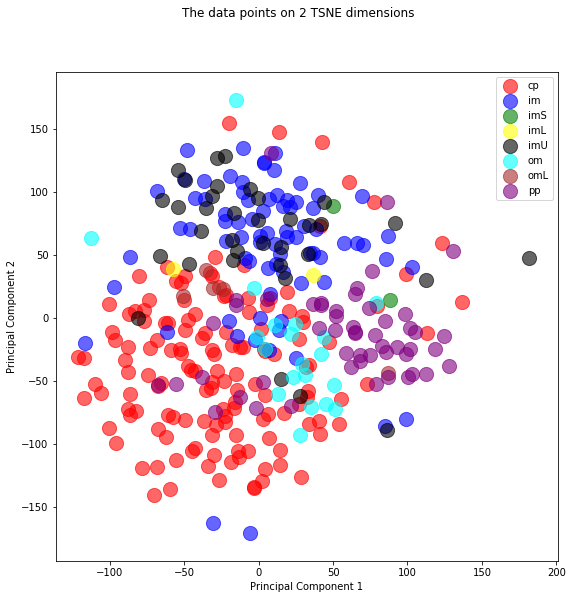

Perplexity = 35


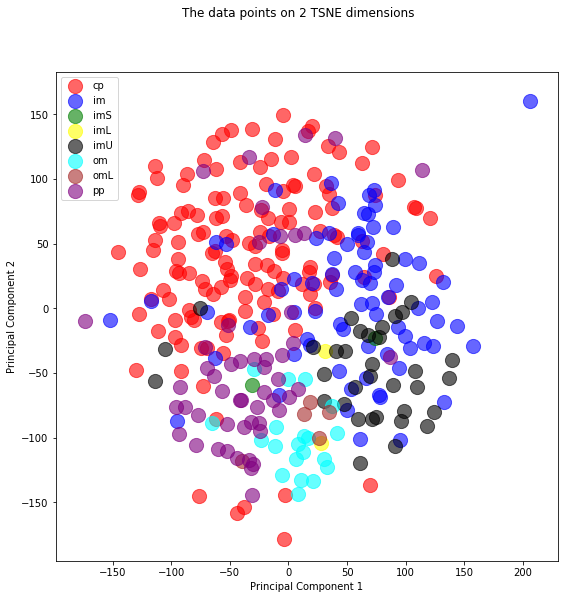

Perplexity = 40


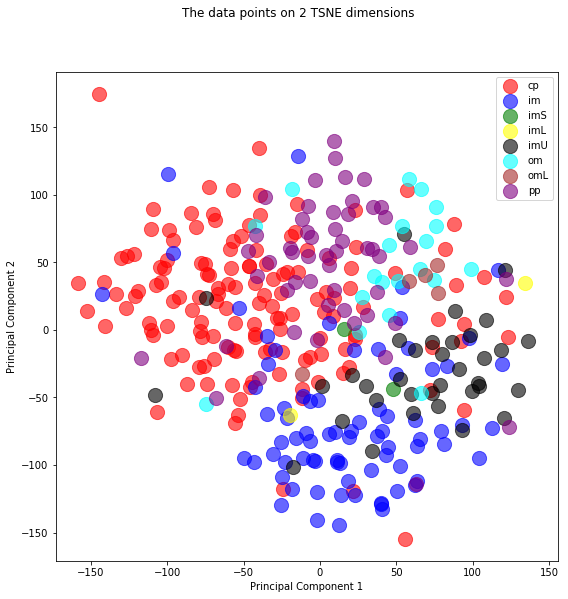

Perplexity = 45


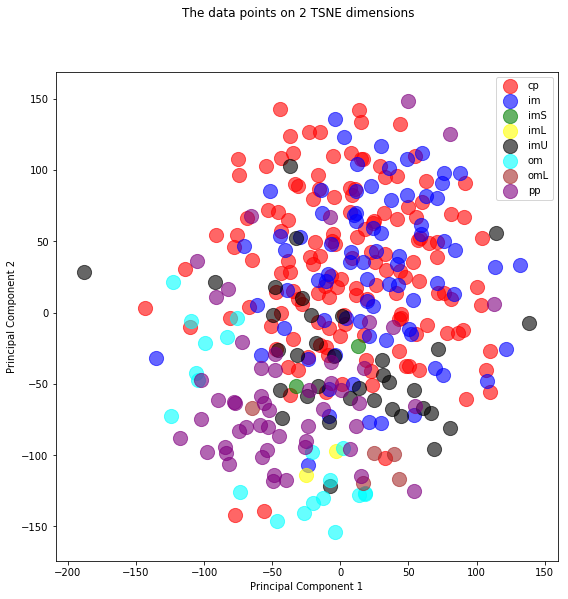

Average Time for TSNE projection: 13.229911995 seconds


In [16]:
import time

starttime = time.time()
ecoli_TSNE = TSNE(n_components=3, perplexity=35, verbose=0).fit_transform(ecoli0)
draw_plot(ecoli_TSNE, ecoli, 'The data points on 2 TSNE dimensions')
endtime = time.time()
print("{:03.9f} seconds".format(endtime-starttime))

# AVERAGE TIME TO COMPUTE TSNE PROJECTION
times = []
n = 0
for i in range(5):
    perplexity = (25+(n*5))
    starttime = time.time()
    print('Perplexity = %d'%(perplexity))
    ecoli_TSNE = TSNE(n_components=3, perplexity= perplexity, verbose=0).fit_transform(ecoli0)
    endtime = time.time()
    draw_plot(ecoli_TSNE, ecoli, 'The data points on 2 TSNE dimensions')
    times.append(endtime-starttime)
    n = n + 1
    
print('Average Time for TSNE projection: {:03.9f} seconds'.format(np.mean(times)))

Looking at the distribution of the different Perplexities, 
it looks like 40 is the best value for perplexity because it groups the different classes 
with the least amount of overlap for this value.

The average Time for TSNE projections is about 13.22 seconds.

### Problem 4c  t-SNE randomization (10 points)

The S of t-SNE means stochastic or random, usually as a function of time.  Explore whether you can reproduce the result in 4b through a second projection and plot.

False


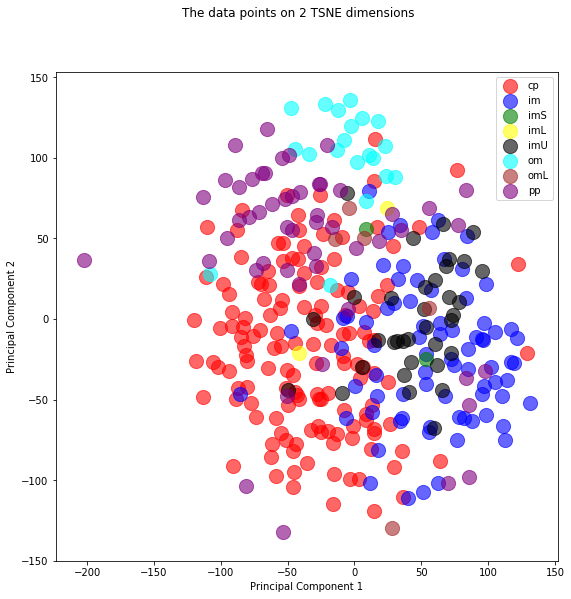

In [17]:
ecoli_TSNE_second = TSNE(n_components=3, perplexity=35, verbose=0).fit_transform(ecoli0)
print(np.allclose(ecoli_TSNE,ecoli_TSNE_second))
draw_plot(ecoli_TSNE_second, ecoli, 'The data points on 2 TSNE dimensions')


Running np.allclose returns false on the second TSNE showing there is variation between 
the two calculations of TSNE in 4b and 4c.  
Looking at the plot it is also clear that there is some variation between the two runs which shows 
unlike PCA, TSNE has randomness in it.

### Problem 4d t-SNE Barnes-Hut  (5 points)

The default t-SNE method of 4b uses the Barnes-Hut approximation.  Keeping the other parameters the same as 4b, plot the t-SNE result using the exact method.  Which method do you prefer?  Compare the average calculation time for the exact method over a number of iterations.

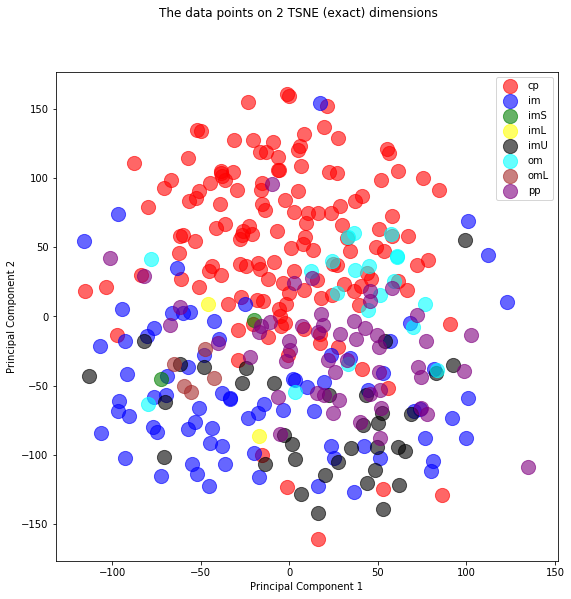

13.064965248 seconds
Average Time for TSNE(exact) projection: 13.893085599 seconds


In [18]:
starttime = time.time()
ecoli_TSNE = TSNE(n_components=3, method='exact', perplexity=35, verbose=0).fit_transform(ecoli0)
draw_plot(ecoli_TSNE, ecoli, 'The data points on 2 TSNE (exact) dimensions')
endtime = time.time()
print("{:03.9f} seconds".format(endtime-starttime))

# AVERAGE TIME TO COMPUTE TSNE PROJECTION
times = []
for i in range(2):
    starttime = time.time()
    ecoli_TSNE = TSNE(n_components=3, method='exact', perplexity=35, verbose=0).fit_transform(ecoli0)
    endtime = time.time()
    times.append(endtime-starttime)
print('Average Time for TSNE(exact) projection: {:03.9f} seconds'.format(np.mean(times)))

The data classes were better seperated using the Barnes-Hut approximation.  
The Average time for computations is also around ~13 seconds using both methods.  
So, I would prefer the default mehtod over the 'exact' method for this computation.

### How many hours did this homework take?  

This will not affect your grade.  We will be monitoring time spent on homework to be sure that we are not over-burdening students.

In [ ]:
16

### Last step (5 points)

Save this notebook as LastnameFirstnameHW1.ipynb such as MuskElonHW1.ipynb.   Create a pdf of this notebook named similarly.  Submit both the python notebook and the pdf version to the Canvas dropbox.  We require both versions.